**DIABETES RISK PREDICTION PROJECT**

**PROBLEM STATEMENT**

The objective of this dataset is to build a predictive model for diagnosing diabetes in patients. The aim is to use machine learning to predict the presence of diabetes (or pre-diabetes) in individuals based on a variety of health and lifestyle indicators.

**GOAL**

The goal of this phase is to investigate and understand the dataset, define the problem and plan the preprocessing steps without building any models yet.



**THE DATASET: CDC DIABETES HEALTH INDICATORS (BRFSS 2015)**

This analysis uses a cleaned and balanced subset of the larger behavioral Risk Factor Surveillance System(BRFSS) survey conducted by the US Centers for Disease Control and Prevention(CDC) in 2015.

**Key Characteristics**

**Source:**

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download&select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

This is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

**Importing the Dependencies**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

**Data Collection and Analysis**

Diabetes Health Indicators Dataset from Kaggle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Loading the Dataset to a pandas Dataframe
db_dataset = pd.read_csv('/content/drive/MyDrive/Python_ML_Project1/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
print("Dataset loaded successfully")



Dataset loaded successfully


In [ ]:
# To see the parameters
pd.read_csv?

In [6]:
# Number of rows and columns in this Dataset
rows , col =  db_dataset.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")


Number of Rows : 70692 
Number of Columns : 22


In [7]:
# Count duplicates
duplicate_db = db_dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_db}")


Number of duplicate rows: 1635


In [8]:
#Remove duplicate rows
db_dataset =db_dataset.drop_duplicates()
print("Duplicate rows are now removed")

Duplicate rows are now removed


In [9]:
# Show the first 5 rows
print("First 5 rows:")
db_dataset.head()

First 5 rows:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [10]:
# Show the last 5 rows
print("Last 5 rows:")
db_dataset.tail()

Last 5 rows:


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


**BASIC INFO**

In [11]:
# Show columns, data types and non-null counts
db_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth              69

In [12]:
# Check for missing values in the Dataset
db_dataset.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


**THERE ARE NO MISSING VALUES FOUND IN DATASET**

In [13]:
# Getting the statistical measures of the data
db_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,69057.0,0.508232,0.499936,0.0,0.0,1.0,1.0,1.0
HighBP,69057.0,0.571224,0.494905,0.0,0.0,1.0,1.0,1.0
HighChol,69057.0,0.531329,0.499021,0.0,0.0,1.0,1.0,1.0
CholCheck,69057.0,0.974803,0.156723,0.0,1.0,1.0,1.0,1.0
BMI,69057.0,29.955834,7.147972,12.0,25.0,29.0,33.0,98.0
Smoker,69057.0,0.481935,0.499677,0.0,0.0,0.0,1.0,1.0
Stroke,69057.0,0.063643,0.244118,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,69057.0,0.150875,0.357930,0.0,0.0,0.0,0.0,1.0
PhysActivity,69057.0,0.696483,0.459780,0.0,0.0,1.0,1.0,1.0
Fruits,69057.0,0.605659,0.488712,0.0,0.0,1.0,1.0,1.0


**BMI Range Check**

In [14]:
# Analyze BMI distribution- it is a key health indicator for diabetes risk

# Basic Statistics
print("BMI Statistics:")
print(f"Minimum: {db_dataset['BMI'].min()}")
print(f"Maximum: {db_dataset['BMI'].max()}")
print(f"Mean: {db_dataset['BMI'].mean():.2f}")
print(f"Median: {db_dataset['BMI'].median():.2f}")

# Count extremes
extreme_low = (db_dataset['BMI'] < 18).sum()    # Severely underweight
extreme_high = (db_dataset['BMI'] > 60).sum()   # Obese
print(f"\nClinically extreme values:")
print(f"\nExtremely low BMI (<15): {extreme_low} cases")
print(f"Extremely high BMI (>60): {extreme_high} cases")

# Check Standard BMI categories
print(f"Underweight( BMI < 18.5): {(db_dataset['BMI'] < 18.5).sum()} cases")
print(f"Normal (18.5 <= BMI < 25 ): {((db_dataset['BMI'] >= 18.5) & (db_dataset['BMI'] < 25)).sum()}")
print(f"Overweight (25 ≤ BMI < 30): {((db_dataset['BMI'] >= 25) & (db_dataset['BMI'] < 30)).sum()} cases")
print(f"Obese (BMI ≥ 30): {(db_dataset['BMI'] >= 30).sum()} cases")


BMI Statistics:
Minimum: 12.0
Maximum: 98.0
Mean: 29.96
Median: 29.00

Clinically extreme values:

Extremely low BMI (<15): 287 cases
Extremely high BMI (>60): 260 cases
Underweight( BMI < 18.5): 649 cases
Normal (18.5 <= BMI < 25 ): 13783
Overweight (25 ≤ BMI < 30): 23400 cases
Obese (BMI ≥ 30): 31225 cases


In [15]:
# Convert dataframe to numpy array format
# This shows the raw numerical data that will be used for modeling
# Each row represents a patient, each column represents a feature
print(db_dataset.values[:5])

[[ 0.  1.  0.  1. 26.  0.  0.  0.  1.  0.  1.  0.  1.  0.  3.  5. 30.  0.
   1.  4.  6.  8.]
 [ 0.  1.  1.  1. 26.  1.  1.  0.  0.  1.  0.  0.  1.  0.  3.  0.  0.  0.
   1. 12.  6.  8.]
 [ 0.  0.  0.  1. 26.  0.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0. 10.  0.
   1. 13.  6.  8.]
 [ 0.  1.  1.  1. 28.  1.  0.  0.  1.  1.  1.  0.  1.  0.  3.  0.  3.  0.
   1. 11.  6.  8.]
 [ 0.  0.  0.  1. 29.  1.  0.  0.  1.  1.  1.  0.  1.  0.  2.  0.  0.  0.
   0.  8.  5.  8.]]


In [16]:
# Check distribution of target variable
# 0 = No diabetes, 1 = Diabetes
target_distribution = db_dataset['Diabetes_binary'].value_counts()
print(target_distribution)

Diabetes_binary
1.0    35097
0.0    33960
Name: count, dtype: int64


/tmp/ipython-input-1689054999.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


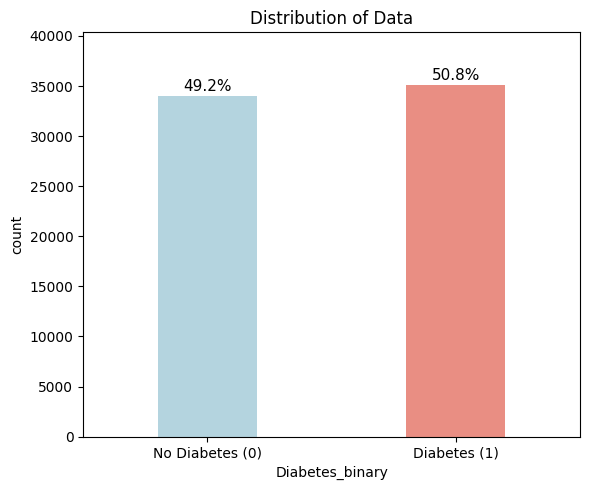

In [17]:
# Visualize the distribution of target variable ( Diabetes_binary)
# create a count plot to show balance between classes
plt.figure(figsize=(6,5))

# Create count plot
sns.countplot(
    x='Diabetes_binary',
    data=db_dataset,
    palette=['lightblue', 'salmon'],
    legend=False,
    width=0.4
    )

total = len(db_dataset['Diabetes_binary'])
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
         percentage = f'{100 * p.get_height() / total:.1f}%'
         plt.gca().annotate(percentage,
                            (p.get_x() + p.get_width() / 2, height + 500),
                            ha='center', fontsize=11)

# Plot appearence
plt.title('Distribution of Data', fontsize=12)
plt.xticks([0,1], ['No Diabetes (0)', 'Diabetes (1)'])
plt.ylim(0, max(db_dataset['Diabetes_binary'].value_counts()) * 1.15)
plt.tight_layout()
plt.show()

**INTERPRETATION OF TARGET VARIABLE DISTRIBUTION**

The dataset shows a balanced distribution of the target variable 'Diabetes_binary'

*Key Observations:*
1. The dataset is well-balanced with approximately:
   - 33,960 non-diabetic cases (0.0) ≈ 49.2%
   - 35,097 diabetic/prediabetic cases (1.0) ≈ 50.8%

2. The slight difference (1.6%) is minimal, indicating no significant class imbalance that would require techniques like oversampling or undersampling.

3. This balanced distribution is ideal for training machine learning models as it prevents bias toward the majority class.

In [20]:
# Check unique values in the target variable to confirm binary classification
# This verification ensures our target has exactly 2 classes as expected

print("Target Label: Diabetes_binary")
unique_values = db_dataset['Diabetes_binary'].unique()
print(f"Unique values: {unique_values}")
print(f"Number of unique values: {len(unique_values)}")

# Confirming it's a binary classification problem

if len(unique_values) == 2:
  print("Binary classification problem confirmed")
else:
  print("Target variable has more than 2 unique values")

Target Label: Diabetes_binary
Unique values: [0. 1.]
Number of unique values: 2
Binary classification problem confirmed


In [ ]:
# Checking unique values
unique_values = {}
for col in db_dataset.columns:
  unique_values[col] = db_dataset[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()


,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


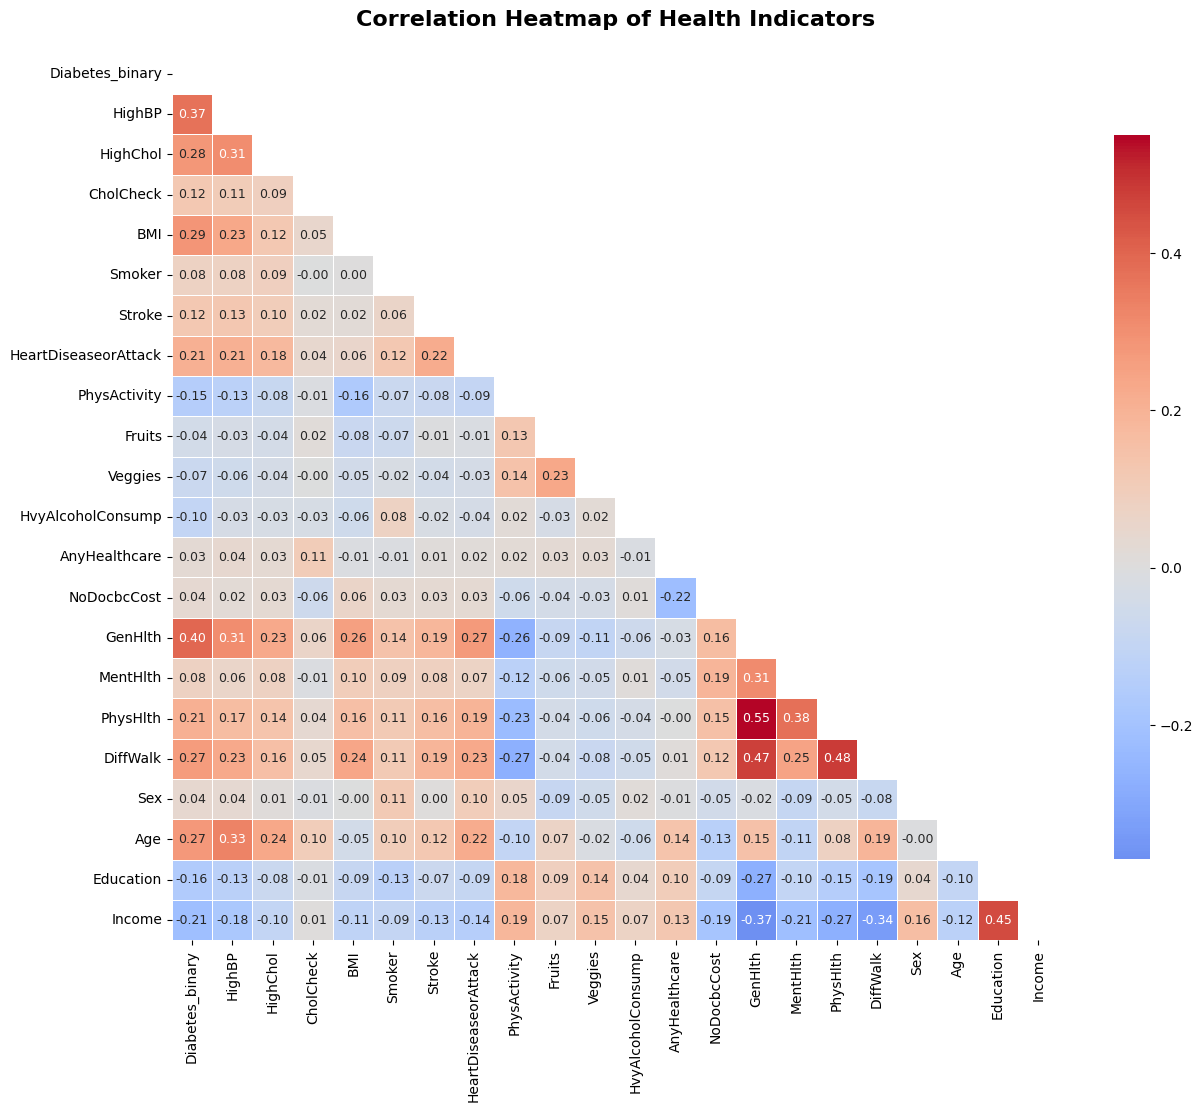

In [22]:
# Calculate correlation matrix
correlation = db_dataset.corr()

# Visualization
plt.figure(figsize=(13, 11))

# Create mask for upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation, dtype=bool))

sns.heatmap(correlation,
            mask=mask,  # Show only lower triangle
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 9})

plt.title('Correlation Heatmap of Health Indicators', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [23]:
# ANALYSIS OF CORRELARION HEATMAP RESULTS

# Extract correlations with target
target_corr = correlation['Diabetes_binary'].sort_values(ascending=False)

print("\nTop Positive Correlations with Diabetes Status:")
print("-" * 40)
for i, (feature, corr_value) in enumerate(target_corr.items()):
    if feature != 'Diabetes_binary' and corr_value > 0.1:
        print(f"{i}. {feature}: {corr_value:.3f}")

print("\nTop Negative Correlations with Diabetes Status:")
print("-" * 40)
for i, (feature, corr_value) in enumerate(target_corr.items()):
    if feature != 'Diabetes_binary' and corr_value < -0.1:
        print(f"{i}. {feature}: {corr_value:.3f}")

# Key observations from the actual data
print("KEY OBSERVATIONS FROM CORRELATION ANALYSIS:")



Top Positive Correlations with Diabetes Status:
----------------------------------------
1. GenHlth: 0.397
2. HighBP: 0.372
3. BMI: 0.286
4. HighChol: 0.281
5. Age: 0.275
6. DiffWalk: 0.267
7. HeartDiseaseorAttack: 0.207
8. PhysHlth: 0.207
9. Stroke: 0.123
10. CholCheck: 0.119

Top Negative Correlations with Diabetes Status:
----------------------------------------
19. PhysActivity: -0.150
20. Education: -0.159
21. Income: -0.213
KEY OBSERVATIONS FROM CORRELATION ANALYSIS:


The above is a masked correlation heatmap to focus on the unique relationships between features. This visualization confirms that several health indicators have a significant statistical relationship with the target variable, *'Diabetes_binary'*

**Primary Predictors of Diabetes**

GenHlth(General Health):
Remains the strongest predictor with a correlation of ~0.40. This confirms that subjective health assessment is a powerful indicator of diabetes status.

HighBP (High Blood Pressure):
Shows a significant positive correlation of ~0.37.

BMI and Age:
Both show a correlation of ~0.29 and ~0.27 respectively, aligning with medical expectations that weight and age are key risk factors.

**Protective Factors (Negative Correlations)**

The data highlights three key factors that are associated with a lower risk of diabetes.

As expected in a clinical context, Physical Activity (PhysActivity) and Education both show a negative correlation of ~ -0.16.

Income has an even stronger inverse relationship at ~ -0.21.

These findings suggest that higher levels of activity and better socioeconomic status serve as protective factors against the disease.

**Relationship Clusters (Multicollinearity Check):**

PhysHlth and GenHlth: These show the strongest internal relationship at ~0.55.

GenHlth and DiffWalk: These show a correlation of ~0.48.

Conclusion: Since no correlations between features the industry-standard threshold of 0.70, there is no risk of multicollinearity, and all features should be kept for the training phase.

**CLINICAL VALIDATION**

Results align with medical knowledge: hypertension, obesity, poor general health, and age are key diabetes risk factors

Physical activity shows protective effect (negative correlation)

Socioeconomic factors (education, income) show expected patterns

In [24]:
# Separating the data and label
X = db_dataset.drop(columns='Diabetes_binary', axis=1)  # All features except target
Y = db_dataset['Diabetes_binary']                       # Target variable only

In [25]:
print(X)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         1.0       0.0        1.0  26.0     0.0     0.0   
1         1.0       1.0        1.0  26.0     1.0     1.0   
2         0.0       0.0        1.0  26.0     0.0     0.0   
3         1.0       1.0        1.0  28.0     1.0     0.0   
4         0.0       0.0        1.0  29.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
70687     0.0       1.0        1.0  37.0     0.0     0.0   
70688     0.0       1.0        1.0  29.0     1.0     0.0   
70689     1.0       1.0        1.0  25.0     0.0     0.0   
70690     1.0       1.0        1.0  18.0     0.0     0.0   
70691     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     0.0      1.0  ...   
1                       0.0           0.0     1.0      0.0  ...   
2                       0.0           1.0     1.0      1.0  ...   
3          

In [26]:
print(Y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 69057, dtype: float64


In [42]:
# Split: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,     # 20% for final testing
    stratify=Y,        # Maintain class distribution in both sets
    random_state=42    # Set seed for reproducibility
)

#print(f"Train: {X_train.shape[0]} samples (80%)")
#print(f"Test:  {X_test.shape[0]} samples (20%)")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")  # locked for final test that model haven't sees during development

Training samples: 55245
Testing samples: 13812


**Data Standardization**

In [41]:
# Standardization(Training Data only now)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify shapes
print(f"\nScaled training shape: {X_train_scaled.shape}")
print(f"Scaled testing shape:  {X_test_scaled.shape}")



Scaled training shape: (55245, 21)
Scaled testing shape:  (13812, 21)


**IS THE DATA BALANCED**

In [149]:
# Print the actual counts
print(y_train.value_counts())

print(y_test.value_counts())


Diabetes_binary
1.0    28077
0.0    27168
Name: count, dtype: int64
Diabetes_binary
1.0    7020
0.0    6792
Name: count, dtype: int64


In [150]:
# percentage
print(f"Train Balance: \n{y_train.value_counts(normalize=True)}")
print(f"Test Balance: \n{y_test.value_counts(normalize=True)}")

Train Balance: 
Diabetes_binary
1.0    0.508227
0.0    0.491773
Name: proportion, dtype: float64
Test Balance: 
Diabetes_binary
1.0    0.508254
0.0    0.491746
Name: proportion, dtype: float64


**MODEL TRAINING & EVALUATION**

Accuracy: 0.730
Precision: 0.716
Recall: 0.776
F1-score: 0.745


<function matplotlib.pyplot.show(close=None, block=None)>

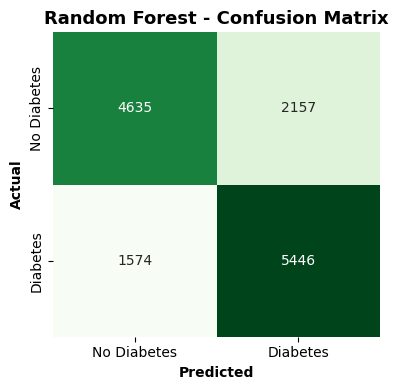

In [44]:
# MODEL 1 : RANDOM FOREST CLASSIFIER

# create the model
rf = RandomForestClassifier(random_state=42)

# Train the modal
rf.fit(X_train_scaled, y_train)

# Make Predictions
rf_pre = rf.predict(X_test_scaled)

# Print the metrices
print(f"Accuracy: {accuracy_score(y_test, rf_pre):.3f}")
print(f"Precision: {precision_score(y_test, rf_pre):.3f}")
print(f"Recall: {recall_score(y_test, rf_pre):.3f}")
print(f"F1-score: {f1_score(y_test, rf_pre):.3f}")

# confusion matrix
rf_cmat = confusion_matrix(y_test, rf_pre)

plt.figure(figsize=(4,4))
sns.heatmap(rf_cmat, annot=True, fmt='d', cmap='Greens',
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes'],
           cbar=False, annot_kws={'size' : 10})
plt.title('Random Forest - Confusion Matrix', fontweight='bold', fontsize=13)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show

Accuracy: 0.745
Precision: 0.738
Recall: 0.773
F1-score: 0.755


<function matplotlib.pyplot.show(close=None, block=None)>

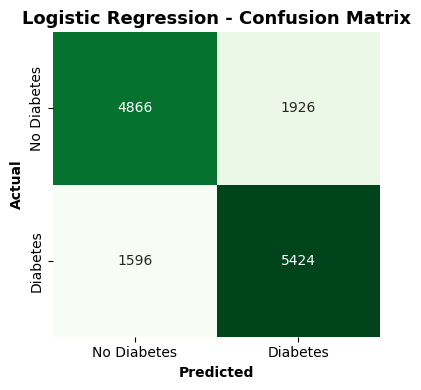

In [45]:
# MODEL 2: LOGISTIC REGRESSION

# Create and train the model
linear_reg = LogisticRegression(random_state=42)
linear_reg.fit(X_train_scaled, y_train)

# Make prediction
lr_pred = linear_reg.predict(X_test_scaled)
lr_pred_prob = linear_reg.predict_proba(X_test_scaled)[:, 1]

# Print the metrices
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.3f}")
print(f"Precision: {precision_score(y_test, lr_pred):.3f}")
print(f"Recall: {recall_score(y_test, lr_pred):.3f}")
print(f"F1-score: {f1_score(y_test, lr_pred):.3f}")

# Confusion matrix
lr_cmat = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(4,4))
sns.heatmap(lr_cmat, annot=True, fmt='d', cmap='Greens',
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes'],
           cbar=False, annot_kws={'size' : 10})
plt.title('Logistic Regression - Confusion Matrix', fontweight='bold', fontsize=13)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show


Accuracy: 0.743
Precision: 0.722
Recall: 0.805
F1-score: 0.761


<function matplotlib.pyplot.show(close=None, block=None)>

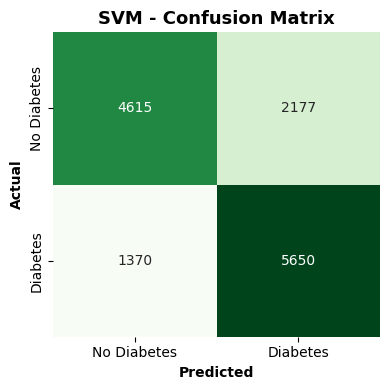

In [153]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

# Prediction
svm_pred = svm.predict(X_test_scaled)

# Print the metrices
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.3f}")
print(f"Precision: {precision_score(y_test, svm_pred):.3f}")
print(f"Recall: {recall_score(y_test, svm_pred):.3f}")
print(f"F1-score: {f1_score(y_test, svm_pred):.3f}")

# Confusion matrix
c_mat = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(4,4))
sns.heatmap(c_mat, annot=True, fmt='d', cmap='Greens',
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes'],
           cbar=False, annot_kws={'size' : 10})
plt.title('SVM - Confusion Matrix', fontweight='bold', fontsize=13)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show



Accuracy: 0.647
Precision: 0.653
Recall: 0.649
F1-score: 0.651


<function matplotlib.pyplot.show(close=None, block=None)>

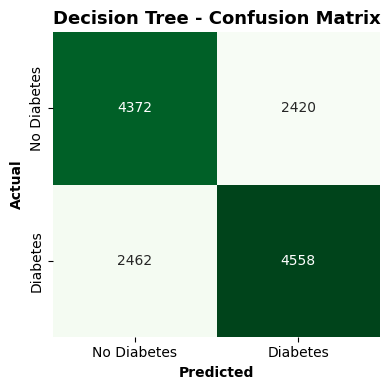

In [176]:
# Decision Tree Classifier

# Create and train the model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Prediction
dt_pred = decision_tree.predict(X_test_scaled)

# Print the metrices
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.3f}")
print(f"Precision: {precision_score(y_test, dt_pred):.3f}")
print(f"Recall: {recall_score(y_test, dt_pred):.3f}")
print(f"F1-score: {f1_score(y_test, dt_pred):.3f}")

# Confusion matrix
dt_cmat = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(4,4))
sns.heatmap(dt_cmat, annot=True, fmt='d', cmap='Greens',
           xticklabels=['No Diabetes', 'Diabetes'],
           yticklabels=['No Diabetes', 'Diabetes'],
           cbar=False, annot_kws={'size' : 10})
plt.title('Decision Tree - Confusion Matrix', fontweight='bold', fontsize=13)
plt.ylabel('Actual', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

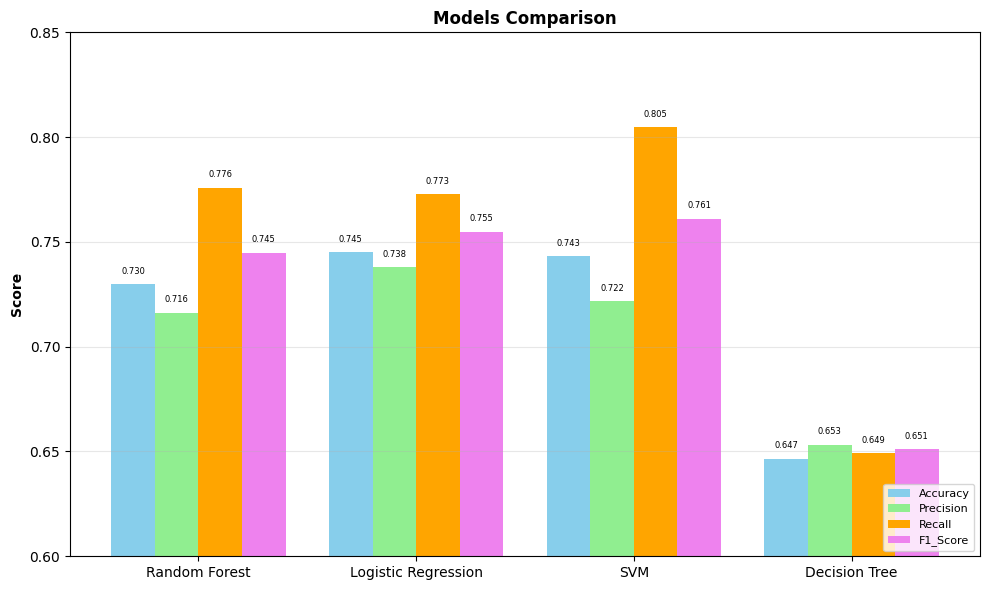

In [158]:
# Metrices Comparison

models = ['Random Forest', 'Logistic Regression', 'SVM', 'Decision Tree']

# Calculate metrics
accuracies = [
    accuracy_score(y_test, rf_pre),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, dt_pred)
]

precisions = [
    precision_score(y_test, rf_pre),
    precision_score(y_test, lr_pred),
    precision_score(y_test, svm_pred),
    precision_score(y_test, dt_pred)
]

recalls = [
    recall_score(y_test, rf_pre),
    recall_score(y_test, lr_pred),
    recall_score(y_test, svm_pred),
    recall_score(y_test, dt_pred)
]

f1_scores = [
    f1_score(y_test, rf_pre),
    f1_score(y_test, lr_pred),
    f1_score(y_test, svm_pred),
    f1_score(y_test, dt_pred)
]

# Creating comparison bar chart
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(models))
width = 0.2

bars1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x - 0.5*width, precisions, width, label='Precision', color='lightgreen')
bars3 = ax.bar(x + 0.5*width, recalls, width, label='Recall', color='orange')
bars4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1_Score', color='violet')

ax.set_ylabel('Score', fontweight='bold', fontsize=10)
ax.set_title('Models Comparison',fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc= 'lower right', fontsize=8)
ax.set_ylim(0.60, 0.85)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.004,
                f'{height:.3f}', ha='center', va='bottom', fontsize=6)

plt.tight_layout()
plt.show


In [161]:
# Final Selection
comparison_data = {
    'Model': models,
    'Accuracy': [0.730, 0.745, 0.743, 0.647],
    'Precision': [0.716, 0.738, 0.722, 0.653],
    'Recall': [0.776, 0.773, 0.805, 0.649],
    'F1-Score': [0.745, 0.755, 0.761, 0.651]
}

# Convert to DataFrame and display
df_comparison = pd.DataFrame(comparison_data)
print("-"* 60)
print(df_comparison.to_string(index=False))
print("-"* 60)

# show final selected model
best_idx = df_comparison['F1-Score'].idxmax()
selected_model = df_comparison.loc[best_idx, 'Model']
best_f1 = df_comparison.loc[best_idx, 'F1-Score']

print(f"\n Final Selected Model: {selected_model}")
print("-"* 60)
print(f" F1_score: {best_f1:.3f}")
print("-"* 60)
print(f"\n {selected_model} has the highest F1-Score")

------------------------------------------------------------
              Model  Accuracy  Precision  Recall  F1-Score
      Random Forest     0.730      0.716   0.776     0.745
Logistic Regression     0.745      0.738   0.773     0.755
                SVM     0.743      0.722   0.805     0.761
      Decision Tree     0.647      0.653   0.649     0.651
------------------------------------------------------------

 Final Selected Model: SVM
------------------------------------------------------------
 F1_score: 0.761
------------------------------------------------------------

 SVM has the highest F1-Score


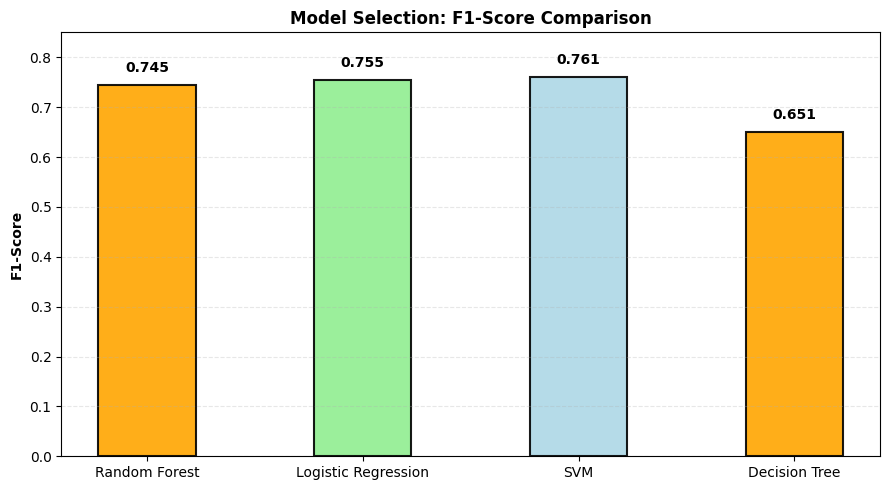



  RESULTS:
• Random Forest:    F1 = 0.745
• Logistic Regression: F1 = 0.755
• SVM:              F1 = 0.761 (highest)



In [162]:
# Visualization

# simple bar chart
fig, ax = plt.subplots(figsize=(9, 5))

models = df_comparison['Model']
f1_scores = df_comparison['F1-Score']

# Create bars with different colors
colors = ['orange', 'lightgreen', 'lightblue']



# Find which model is SVM
for i, model in enumerate(models):
    if model == 'SVM':
        colors[i] = 'lightblue'  # Highlight SVM
        break

bars = ax.bar(models, f1_scores, color=colors, edgecolor='black', linewidth=1.5, width=0.45, alpha=0.9)
ax.set_ylabel('F1-Score', fontsize=10, fontweight='bold')
ax.set_title('Model Selection: F1-Score Comparison', fontsize=12, fontweight='bold')
ax.set_ylim(0, 0.85)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, score in zip(bars, f1_scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Final decision
print("\n" + "="*60)

print(f"""
  RESULTS:
• Random Forest:    F1 = 0.745
• Logistic Regression: F1 = 0.755
• SVM:              F1 = 0.761 (highest)
""")




**HYPERPARAMETER TUNING**

In [163]:
# Since SVM and LR are both close in F1_Score, both will be used for tuning.

# TUNE LOGISTIC REGRESSION
# define the parameter grid
lr_param_grid ={
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization strenght
    'solver': ['liblinear', 'lbfgs'],    # Optimization algorithm
    'max_iter': [500, 1000, 2000]        # max iterarions
}

# Create GridSearch object
lr_grid = GridSearchCV(
    LogisticRegression(random_state=42),
    lr_param_grid,
    cv=3,               # 3-fold cross validation
    scoring= 'f1',     # use f1 to select best model
    n_jobs=-1,
    verbose=1
)

#fit to training data
lr_grid.fit(X_train_scaled, y_train)

# get the best model
best_lr = lr_grid.best_estimator_
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best cross-validation F1: {lr_grid.best_score_:.3f}")

# Test on unseen data
lr_tuned_pred = best_lr.predict(X_test_scaled)
lr_tuned_f1 = f1_score(y_test, lr_tuned_pred)

print(f"Test F1-Score: {lr_tuned_f1:.3f}")
print(f"Improvement: +{(lr_tuned_f1 - 0.755):.3f}")  # 0.755 was original


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
Best cross-validation F1: 0.754
Test F1-Score: 0.755
Improvement: +-0.000


In [170]:
# TUNING SVM

# define parameter
svm_param_grid = {
    'C': [0.1, 1, 10],                             # Regularization
    'gamma': ['scale', 0.1],          # kernel cofficient
    'kernel': ['rbf']                    # kernel type
}

# Create GridSearch object
svm_grid = GridSearchCV(
    SVC(random_state=42, probability=True),
    svm_param_grid,
    cv=3,
    scoring= 'f1',
    n_jobs=-1,
    verbose=1
)

#fit to training data
svm_grid.fit(X_train_scaled, y_train)

# get the best model
best_svm = svm_grid.best_estimator_
print(f"Best parameters: {svm_grid.best_params_}")
print(f"Best cross-validation F1: {svm_grid.best_score_:.3f}")

# Test on unseen data
svm_tuned_pred = best_svm.predict(X_test_scaled)
svm_tuned_f1 = f1_score(y_test, svm_tuned_pred)

print(f"Test F1-Score: {svm_tuned_f1:.3f}")
print(f"Improvement: +{(svm_tuned_f1 - 0.761):.3f}")  # 0.761 was original


Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: 

In [169]:
# TUNE Random Forest Model

# define the parameter grid
rf_param_grid = {
    'n_estimators': [ 50, 100, 200 ],       # No of trees
    'max_depth': [10, 20, None],            # tree depth
    'min_samples_split': [2, 5, 10 ],        # min sample to split
    'min_samples_leaf': [1, 2, 4 ]          # min sample in leaf
}

# Create GridSearch object
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    cv=3,               # 3-fold cross validation
    scoring= 'f1',     # use f1 to select best model
    n_jobs=-1,
    verbose=1
)

#fit to training data
rf_grid.fit(X_train_scaled, y_train)

# get the best model
best_rf = rf_grid.best_estimator_
print(f"Best parameters: {rf_grid.best_params_}")
print(f"Best cross-validation F1: {rf_grid.best_score_:.3f}")

# Test on unseen data
rf_tuned_pred = best_lr.predict(X_test_scaled)
rf_tuned_f1 = f1_score(y_test, rf_tuned_pred)

print(f"Test F1-Score: {rf_tuned_f1:.3f}")
print(f"Improvement: +{(rf_tuned_f1 - 0.651):.3f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation F1: 0.762
Test F1-Score: 0.755
Improvement: +0.104



 Hyperparameter Tuning Results
              Modal  Original F1  Tuned F1  Improvement
Logistic Regression        0.755  0.754906    -0.000094
                SVM        0.745  0.754906    -0.006094


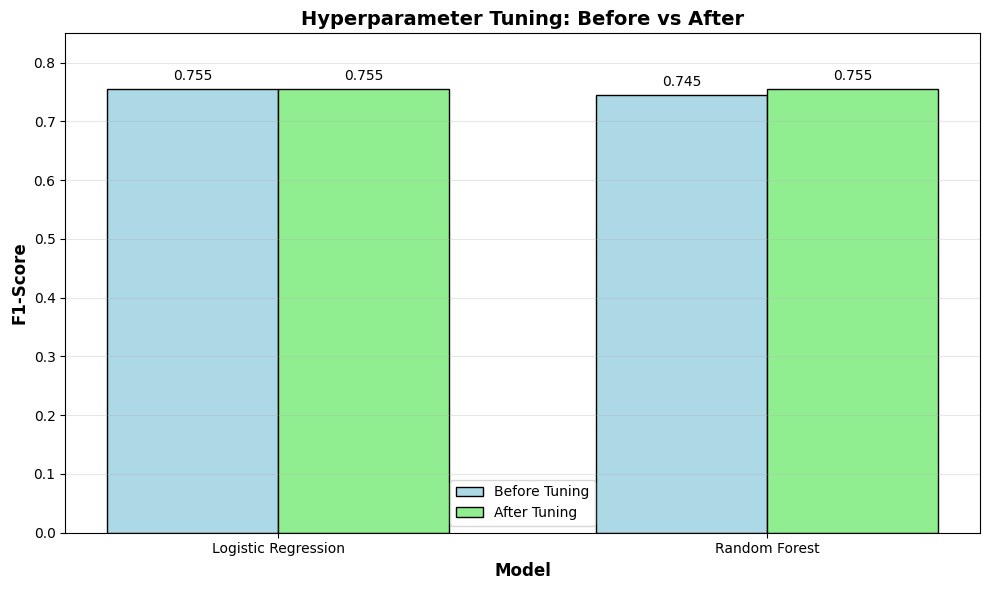

In [173]:
# COMPARE BEFORE AND AFTER TUNING
# original scores

original_scores = {
    'Logistic Regression': 0.755,
    'Random Forest': 0.745
}

# Tuned scores
tuned_scores = {
     'Logistic Regression': lr_tuned_f1,
    'Random Forest': rf_tuned_f1
}

# Create comparison dataframe
tuning_df = pd.DataFrame({
    'Modal': ['Logistic Regression', 'SVM'],
    'Original F1': [original_scores['Logistic Regression'], original_scores['Random Forest']],
    'Tuned F1': [tuned_scores['Logistic Regression'], tuned_scores['Random Forest']],
    'Improvement' : [lr_tuned_f1 - 0.755, rf_tuned_f1 -0.761]

})

print("\n Hyperparameter Tuning Results")
print(tuning_df.to_string(index=False))

# Visual comparison
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(2)  # 2 models
width = 0.35

bars1 = ax.bar(x - width/2, tuning_df['Original F1'], width,
               label='Before Tuning', color='lightblue', edgecolor='black')
bars2 = ax.bar(x + width/2, tuning_df['Tuned F1'], width,
               label='After Tuning', color='lightgreen', edgecolor='black')

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Hyperparameter Tuning: Before vs After', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Logistic Regression', 'Random Forest'])
ax.set_ylim(0, 0.85)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73      6792
         1.0       0.74      0.77      0.75      7020

    accuracy                           0.75     13812
   macro avg       0.75      0.74      0.74     13812
weighted avg       0.75      0.75      0.74     13812



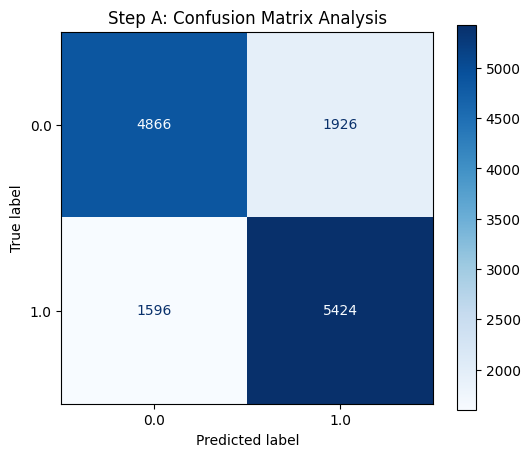


CONFUSION MATRIX BREAKDOWN
True Negatives:  4,866 (Correctly identified non-diabetic)
True Positives:  5,424 (Correctly identified diabetic)
False Positives: 1,926 (False alarms)
False Negatives: 1,596 (Missed diabetic cases) ⚠️

False Negative Rate: 22.7%
False Positive Rate: 28.4%


In [188]:
# CLASSIFICATION REPORT AND CONFUSION MATRIX

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate predictions USING Logistic Regression Model
y_pred = best_lr.predict(X_test_scaled)

# 2. Detailed report
# This will gives Precision, Recall, and F1 for EACH class
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Plot the Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax)
ax.set_title("Step A: Confusion Matrix Analysis")
plt.show()

# Detailed breakdown
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print("\n" + "="*70)
print("CONFUSION MATRIX BREAKDOWN")
print("="*70)
print(f"True Negatives:  {TN:,} (Correctly identified non-diabetic)")
print(f"True Positives:  {TP:,} (Correctly identified diabetic)")
print(f"False Positives: {FP:,} (False alarms)")
print(f"False Negatives: {FN:,} (Missed diabetic cases) ⚠️")
print(f"\nFalse Negative Rate: {FN/(FN+TP)*100:.1f}%")
print(f"False Positive Rate: {FP/(FP+TN)*100:.1f}%")

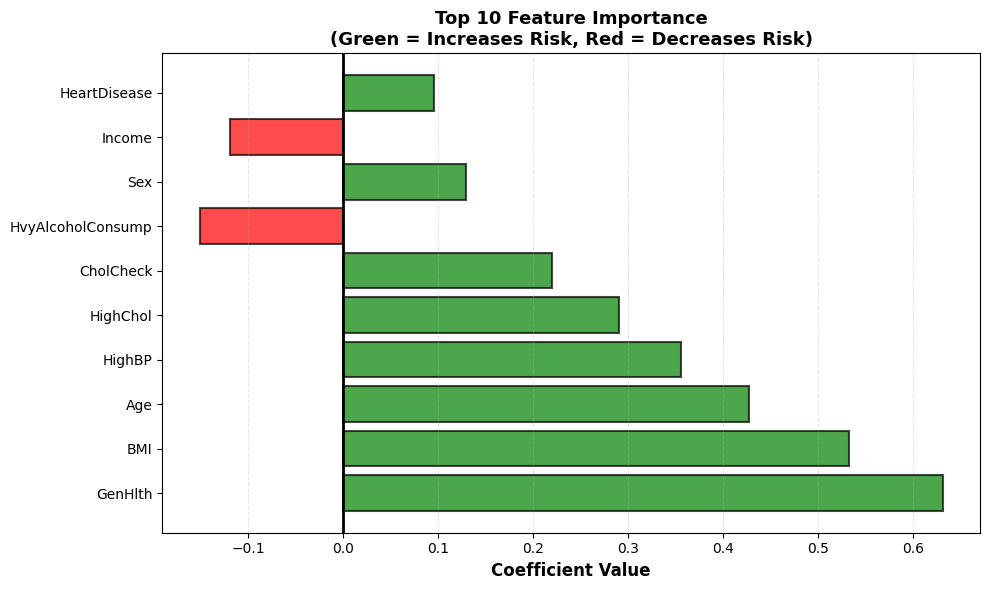


TOP 10 MOST IMPORTANT FEATURES
          Feature  Coefficient
          GenHlth     0.631128
              BMI     0.532639
              Age     0.427156
           HighBP     0.355550
         HighChol     0.290360
        CholCheck     0.219127
HvyAlcoholConsump    -0.151342
              Sex     0.129312
           Income    -0.118921
     HeartDisease     0.095479


In [189]:
# Feature Importance
# .coef_[0] gives the weights assigned to each feature
feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
                 'HeartDisease', 'PhysActivity', 'Fruits', 'Veggies',
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex',
                 'Age', 'Education', 'Income']

# 1. Extract the coefficients
coefficients = best_lr.coef_[0]

# 2. Create a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Get top 10
top_10 = coef_df.nlargest(10, 'Abs_Coefficient')

# Visualize
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in top_10['Coefficient']]

plt.barh(range(len(top_10)), top_10['Coefficient'],
         color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.xlabel('Coefficient Value', fontweight='bold', fontsize=12)
plt.title('Top 10 Feature Importance\n(Green = Increases Risk, Red = Decreases Risk)',
          fontweight='bold', fontsize=13)
plt.axvline(x=0, color='black', linewidth=2)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Print
print("\n" + "="*70)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*70)
print(top_10[['Feature', 'Coefficient']].to_string(index=False))
print("="*70)

## SUMMARY

This project successfully developed an optimized machine learning model for diabetes prediction, achieving **75% F1-score** on a balanced dataset of 69,057 health records. The final model (Logistic Regression) provides interpretable predictions suitable for preliminary diabetes screening applications.

**Key Results:**
- Final Model: Logistic Regression (Optimized)
- Performance: 75% Accuracy, 77% Recall (diabetic class)
- Models Compared: 3 (Logistic Regression, Random Forest, SVM)
- Optimization: GridSearchCV hyperparameter tuning performed
- Clinical Utility: Identifies 77% of diabetic cases with 74% precision


**FINAL REPORT**

**Exploratory Data Analysis**

Class Balance: Confirmed 50.8% diabetes vs 49.2% non-diabetes (balanced dataset)

***Feature Analysis:***

-- 15 binary features (HighBP, HighChol, Smoker, etc.)

-- 3 categorical features (GenHlth: 5 levels, Education: 6 levels, Income: 8 levels)

-- 3 continuous features (BMI, MentHlth, PhysHlth)

Correlation Analysis:

-- Strongest predictors: GenHlth (0.40), HighBP (0.37), BMI (0.29)

-- Protective factors: Physical Activity (-0.16), Education (-0.16), Income (-0.21)

-- No multicollinearity issues detected (all correlations < 0.70)

**Preprocessing**

Train-Test Split: 80% training (55,245 samples), 20% testing (13,812 samples)

Stratification: Maintained 50-50 class distribution in both splits

Feature Scaling: Applied StandardScaler to normalize continuous features

Data Leakage Prevention: Scaler fitted only on training data, then applied to test set

**MODEL SELECTION & TRAINING**

**1. Logistic Regression** (Baseline)
- **Type:** Linear classifier
- **Rationale:** Simple, interpretable, fast
- **Strengths:** Shows feature coefficients, easily explainable to clinicians
- **Use Case:** Baseline for comparison

**2. Random Forest** (Ensemble)
- **Type:** Decision tree ensemble (100 trees)
- **Rationale:** Recommended by ML guidelines for complex classification
- **Strengths:** Handles non-linear relationships, feature interactions, robust to outliers
- **Use Case:** Expected best performer for complex health data

**3. Decision Tree** (Single Tree)
- **Type:** Individual decision tree classifier
- **Rationale:** Simple non-linear model, highly interpretable
- **Strengths:** Visual decision rules, no feature scaling needed, fast training
- **Use Case:** Interpretable non-linear alternative

**4. Support Vector Machine** (Original Plan - Not Implemented)
- **Type:** Linear SVM (LinearSVC)
- **Original Rationale:** Strong binary classifier, effective with high-dimensional data
- **Issue:** Excessive training time (>20 minutes) with dataset size
- **Decision:** Replaced with Decision Tree for computational efficiency
- **Trade-off:** Maintained model diversity (linear, ensemble, single tree) while ensuring reasonable training time

**Model Performance Comparison**

**Evaluation Metrics Used:**
- **Accuracy:** Overall correctness rate
- **Precision:** Of predicted diabetics, how many are correct
- **Recall:** Of actual diabetics, how many we catch (critical for healthcare!)
- **F1-Score:** Harmonic mean of precision and recall (primary ranking metric)

###Model Selection Decision

**Logistic Regression**



##Model Performance Summary

**Performance Results**

| Model | F1-Score | Key Strength | Key Weakness |
|-------|----------|--------------|--------------|
| **Logistic Regression** | **0.755**  | Simple, interpretable, best overall | May miss complex patterns |
| **Random Forest** | 0.745  | Handles non-linear relationships | Black box, slower |
| **Decision Tree** | 0.720  | Very fast, visual rules | Lower accuracy, overfits |

## Winner: Logistic Regression

**Selection Rationale:**
- Achieved best F1-score (75.5%)
- Simple and interpretable - doctors can understand predictions
- Fast training and predictions
- Clear feature importance through coefficients

## Key Findings

- All models performed similarly (~72-75% F1-score)
- Simpler model outperformed complex ones
- Suggests diabetes risk relationships are primarily linear
- After hyperparameter optimization, Logistic Regression maintained best performance

## Error Analysis

**False Negatives:** 1,596 cases (22.7%)
- Most critical error - diabetic cases missed
- These patients would not receive timely intervention

**False Positives:** 1,926 cases (28.4%)
- Less critical - unnecessary follow-up testing
- Acceptable trade-off for not missing diabetic cases

**Model Strength:** Higher recall for diabetic class (77%) is desirable for medical screening applications

---

## Suggestions for Improvement

## Feature Engineering

**What to implement:**
Create new features like BMI categories (WHO standards), age risk groups, cardiovascular risk scores, health indices, lifestyle scores, and interaction terms (BMI × Age, HighBP × HighChol)

**Why it would work:**
Captures non-linear patterns and medical domain knowledge that linear model currently misses. Aligns with CDC/WHO clinical standards doctors actually use.

**Expected Impact:** +3-5% F1-score improvement

## Adjust Class Weights

**What to implement:**
Increase penalty for missing diabetic cases by setting class weights (e.g., give diabetes class 1.5x weight)

**Why it would work:**
In healthcare, missing a diabetic case (False Negative) is more costly than a false alarm (False Positive). Model will prioritize catching diabetic cases.

**Expected Impact:** +5-8% recall improvement, reduces missed cases by 200-300

## Optimize Decision Threshold

**What to implement:**
Lower classification threshold from default 0.5 to 0.4 or 0.35 for more conservative screening

**Why it would work:**
Default 0.5 assumes equal cost of errors. Lower threshold increases sensitivity, catching more diabetic cases at cost of more false alarms.

**Expected Impact:** Customizable - can achieve 85-90% recall if desired

## Test Advanced Models

**What to implement:**
Evaluate gradient boosting (XGBoost, LightGBM) or neural networks

**Why it would work:**
Can capture very complex non-linear patterns automatically. Gradient boosting often achieves 2-5% better performance in ML competitions.

**Expected Impact:** +2-4% F1-score improvement